<div class="alert alert-block alert-success">
    


## <center> Dijkstra's Algorithm  </center>
</div>
    
    

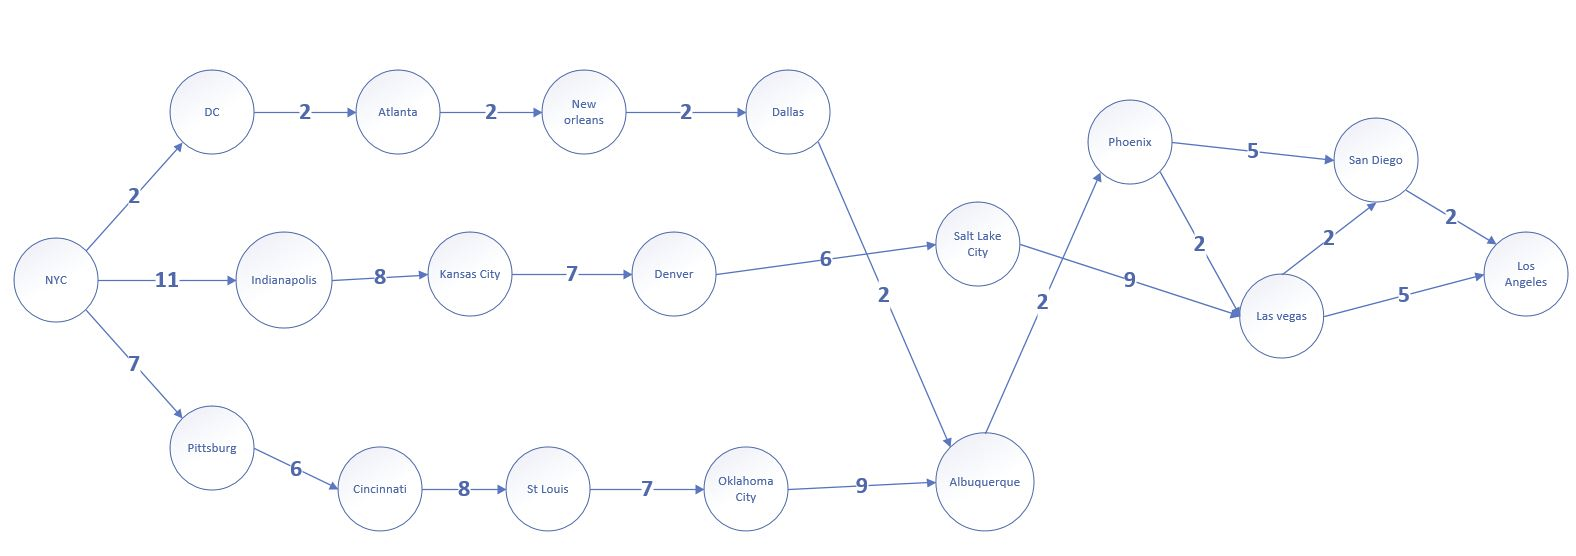

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
%matplotlib inline


### Build the Graph


In [2]:
# create graph of routes/paths of the IMAGE presented above
def get_graph():
    graph = {}
    graph["NYC"] = {}
    graph["NYC"]["DC"] = 2
    graph["NYC"]["Indianapolis"] = 11
    graph["NYC"]["Pittsburg"] = 7
    graph["DC"] = {}
    graph["DC"]["Atlanta"] = 2
    graph["Atlanta"] = {}
    graph["Atlanta"]["New Orleans"] = 2
    graph["New Orleans"] = {}
    graph["New Orleans"]["Dallas"] = 2
    graph["Dallas"] = {}
    graph["Dallas"]["Albuquerque"] = 2
    graph["Albuquerque"] = {}
    graph["Albuquerque"]["Phoenix"] = 2
    graph["Phoenix"] = {}
    graph["Phoenix"]["Las Vegas"] = 2
    graph["Phoenix"]["San Diego"] = 5
    graph["Las Vegas"] = {}
    graph["Las Vegas"]["San Diego"] = 2
    graph["Las Vegas"]["Los Angeles"] = 5
    graph["San Diego"] = {}
    graph["San Diego"]["Los Angeles"] = 2
    graph["Indianapolis"] = {}
    graph["Indianapolis"]["Kansas City"] = 8
    graph["Kansas City"] = {}
    graph["Kansas City"]["Denver"] = 7
    graph["Denver"] = {}
    graph["Denver"]["Salt Lake City"] = 6
    graph["Salt Lake City"] = {}
    graph["Salt Lake City"]["Las Vegas"] = 9
    graph["Pittsburg"] = {}
    graph["Pittsburg"]["Cincinnati"] = 6
    graph["Cincinnati"] = {}
    graph["Cincinnati"]["St Louis"] = 8
    graph["St Louis"] = {}
    graph["St Louis"]["Oklahoma City"] = 7
    graph["Oklahoma City"] = {}
    graph["Oklahoma City"]["Albuquerque"] = 9
    graph["Los Angeles"] = {}
    return graph

get_graph()

{'NYC': {'DC': 2, 'Indianapolis': 11, 'Pittsburg': 7},
 'DC': {'Atlanta': 2},
 'Atlanta': {'New Orleans': 2},
 'New Orleans': {'Dallas': 2},
 'Dallas': {'Albuquerque': 2},
 'Albuquerque': {'Phoenix': 2},
 'Phoenix': {'Las Vegas': 2, 'San Diego': 5},
 'Las Vegas': {'San Diego': 2, 'Los Angeles': 5},
 'San Diego': {'Los Angeles': 2},
 'Indianapolis': {'Kansas City': 8},
 'Kansas City': {'Denver': 7},
 'Denver': {'Salt Lake City': 6},
 'Salt Lake City': {'Las Vegas': 9},
 'Pittsburg': {'Cincinnati': 6},
 'Cincinnati': {'St Louis': 8},
 'St Louis': {'Oklahoma City': 7},
 'Oklahoma City': {'Albuquerque': 9},
 'Los Angeles': {}}

In [3]:
# define start and end nodes
origin, destination = 'NYC', 'Los Angeles'


### Use BFS to find shortest route from NYC to LA 


In [4]:
# BFS implementation modified from:
# https://pythoninwonderland.wordpress.com/2017/03/18/how-to-implement-breadth-first-search-in-python/

# finds shortest path between 2 nodes of a graph using BFS
def bfs_shortest_path(graph, origin, destination):
    # keep track of explored nodes
    explored = []
    # keep track of all the paths to be checked
    queue = [[origin]]

    # return path if origin is destination
    if origin == destination:
        return "origin = destination"

    # keeps looping until all possible paths have been checked
    while queue:
        # pop the first path from the queue
        path = queue.pop(0)
        # get the last node from the path
        node = path[-1]
        if node not in explored:
            neighbours = graph[node]
            # go through all neighbour nodes, construct a new path and
            # push it into the queue
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                # return path if neighbour is destination
                if neighbour == destination:
                    return new_path

            # mark node as explored
            explored.append(node)

    # in case there's no path between the 2 nodes
    return "a connecting path doesn't exist." 

In [5]:
# get graph
graph = get_graph()

# get shortest path using BFS
start_time = time.perf_counter()
bfs_path = bfs_shortest_path(graph=graph, origin=origin, destination=destination)
end_time = time.perf_counter()
bfs_time = (end_time - start_time) * 1000

# get cost for BFS path using edge weights
bfs_costs = [graph.get(bfs_path[ii]).get(bfs_path[ii + 1])
             for ii, xx in enumerate(bfs_path) if ii < len(bfs_path) - 1]
bfs_cost = sum(bfs_costs)

In [6]:
%%timeit -qo test_graph = get_graph()
# use Ipython magic command to get mean execution time
test = bfs_shortest_path(graph=test_graph, origin=origin, destination=destination)

<TimeitResult : 8.14 µs ± 7.33 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)>

In [7]:
# convert mean execution time to milliseconds
bfs_time_mean = _.average*1e3 

In [8]:
# print BFS output
print('Shortest path by BFS:')
print(' --> '.join(bfs_path))
path_length = len(bfs_path)
num_stops = len([xx for xx in bfs_path if xx != origin and xx != destination])
print(f'\ntotal path length = {path_length} cities ({num_stops} stops between {origin} and {destination})')

print(f'total cost = {bfs_cost} hours')

Shortest path by BFS:
NYC --> Indianapolis --> Kansas City --> Denver --> Salt Lake City --> Las Vegas --> Los Angeles

total path length = 7 cities (5 stops between NYC and Los Angeles)
total cost = 46 hours



### Use Dijkstra's algorithm to find the shortest route from NYC to LA


In [9]:
# get the costs table and parents table

def get_costs():
    # the costs table
    infinity = float("inf")
    costs = {}
    costs["DC"] = 2
    costs["Atlanta"] = infinity
    costs["New Orleans"] = infinity
    costs["Dallas"] = infinity
    costs["Albuquerque"] = infinity
    costs["Phoenix"] = infinity
    costs["Las Vegas"] = infinity
    costs["San Diego"] = infinity
    costs["Indianapolis"] = 11
    costs["Kansas City"] = infinity
    costs["Denver"] = infinity
    costs["Salt Lake City"] = infinity
    costs["Pittsburg"] = 7
    costs["Cincinnati"] = infinity
    costs["St Louis"] = infinity
    costs["Oklahoma City"] = infinity
    costs["Los Angeles"] = infinity 
    return costs

def get_parents():
    # the parents table
    parents = {}
    parents["DC"] = "NYC"
    parents["Atlanta"] = None
    parents["New Orleans"] = None
    parents["Dallas"] = None
    parents["Albuquerque"] = None
    parents["Phoenix"] = None
    parents["Las Vegas"] = None
    parents["San Diego"] = None
    parents["Indianapolis"] = "NYC"
    parents["Kansas City"] = None
    parents["Denver"] = None
    parents["Salt Lake City"] = None
    parents["Pittsburg"] = "NYC"
    parents["Cincinnati"] = None
    parents["St Louis"] = None
    parents["Oklahoma City"] = None
    parents["Los Angeles"] = None
    return parents

In [10]:
# Bhargava's helper function for finding the lowest-cost node
def find_lowest_cost_node(costs, processed):
    lowest_cost = float("inf")
    lowest_cost_node = None
    # Go through each node.
    for node in costs:
        cost = costs[node]
        # If it's the lowest cost so far and hasn't been processed yet...
        if cost < lowest_cost and node not in processed:
            # ... set it as the new lowest-cost node.
            lowest_cost = cost
            lowest_cost_node = node
    return lowest_cost_node

# Dijkstra's algorithm modified from Bhargava's implementation
def dijkstra(graph, costs, parents, destination):
    processed = []  # initialize processed list
    
    # Find the lowest-cost node that you haven't processed yet.
    node = find_lowest_cost_node(costs, processed)
    # If you've processed all the nodes, or reach the destination, this while loop is done.
    while node is not None and node != destination:
        cost = costs[node]
        # Go through all the neighbors of this node.
        neighbors = graph[node]
        for n in neighbors.keys():
            new_cost = cost + neighbors[n]
            # If it's cheaper to get to this neighbor by going through this node...
            if costs[n] > new_cost:
                # ... update the cost for this node.
                costs[n] = new_cost
                # This node becomes the new parent for this neighbor.
                parents[n] = node
        # Mark the node as processed.
        processed.append(node)
        # Find the next node to process, and loop.
        node = find_lowest_cost_node(costs, processed)
        
    if node == destination: processed.append(node) # add destination node
    return {'processed':processed, 'costs':costs, 'parents':parents}

# helper function to build a path from the updated parents table
def get_path_from_parents(parents, origin, destination):
    # start at destination 
    current_node = destination
    path = [current_node]
    # trace back to origin by performing dict lookups on parent nodes
    while current_node != origin and current_node is not None:
        current_node = parents.get(current_node)
        # print(current_node)
        path.append(current_node)
    
    # reverse the path and remove None from path if present
    path = path[::-1]
    path = [xx for xx in path if xx]
    return path

In [11]:
# get graph and costs + parents tables
graph = get_graph()
costs = get_costs()
parents = get_parents()

# use Dijkstra's algorithm to update the costs + parents table
start_time = time.perf_counter()
dijkstra_results = dijkstra(graph=graph, costs=costs, 
                            parents=parents, destination=destination)

# get final path using the updated parents table
dijkstra_path = get_path_from_parents(parents=dijkstra_results['parents'], 
                                      origin=origin, destination=destination)
end_time = time.perf_counter()
dijkstra_time = (end_time - start_time) * 1000

# get the cost
dijkstra_cost = dijkstra_results['costs'][destination]

In [12]:
%%timeit -qo test_graph, test_costs, test_parents = get_graph(), get_costs(), get_parents() 
# use Ipython magic command to get mean execution time
test1 = dijkstra(graph=test_graph, costs=test_costs, parents=test_parents, destination=destination)
test2 = get_path_from_parents(parents=test1['parents'], origin=origin, destination=destination)

<TimeitResult : 26.8 µs ± 56.7 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)>

In [13]:
# convert mean execution time to milliseconds
dijkstra_time_mean = _.average*1e3 # milliseconds

In [14]:
%%timeit -qo test_graph, test_costs, test_parents = get_graph(), get_costs(), get_parents() 
# test: use Ipython magic command to get mean execution time without getting the final path
test1 = dijkstra(graph=test_graph, costs=test_costs, parents=test_parents, destination=destination)

<TimeitResult : 24.9 µs ± 79.6 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)>

In [15]:
# print Dijkstra output
print('Shortest path by Dijkstra:')
print(' --> '.join(dijkstra_path))
path_length = len(dijkstra_path)
num_stops = len([xx for xx in dijkstra_path if xx != origin and xx != destination])
print(f'\ntotal path length = {path_length} cities ({num_stops} stops between {origin} and {destination})')

print(f'total cost = {dijkstra_cost} hours')

Shortest path by Dijkstra:
NYC --> DC --> Atlanta --> New Orleans --> Dallas --> Albuquerque --> Phoenix --> Las Vegas --> San Diego --> Los Angeles

total path length = 10 cities (8 stops between NYC and Los Angeles)
total cost = 18 hours



### Compare performance and the effectiveness of the two algorithms to find the shortest route


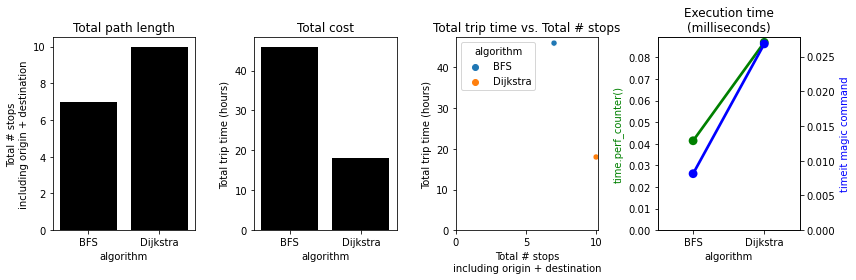

In [16]:
# create the comparative analysis table
df = pd.DataFrame({'algorithm':['BFS', 'Dijkstra'], 
                   'total_path_length':[len(bfs_path), len(dijkstra_path)], # including origin + destination
                   'num_stops':[len(bfs_path)-2, len(dijkstra_path)-2], # excluding origin + destination
                   'total_cost':[bfs_cost, dijkstra_cost], 
                   'execution_time':[bfs_time, dijkstra_time], # time.perf_counter()
                   'mean_execution_time':[bfs_time_mean, dijkstra_time_mean], # Ipython timeit magic command
                   'shortest path':[bfs_path, dijkstra_path]
                  })

# create bar plots to compare the 2 algorithms
fig, axs = plt.subplots(1,4, figsize=(12,4))

sns.barplot(x='algorithm', y='total_path_length', data=df, color='k', ax=axs[0])
axs[0].set(ylabel='Total # stops\nincluding origin + destination', title='Total path length')

sns.barplot(x='algorithm', y='total_cost', data=df, color='k', ax=axs[1])
axs[1].set(ylabel='Total trip time (hours)', title='Total cost')

sns.scatterplot(x='total_path_length', y='total_cost', data=df, hue='algorithm', ax=axs[2])
axs[2].set_xlim([0, None])
axs[2].set_ylim([0, None])
axs[2].set(ylabel='Total trip time (hours)', xlabel='Total # stops\nincluding origin + destination', 
           title='Total trip time vs. Total # stops')

sns.pointplot(x='algorithm', y='execution_time', data=df, ax=axs[3], color='g')
axs[3].set_ylabel('time.perf_counter()', color='g')
axs[3].set_title('Execution time\n(milliseconds)')
axs[3].set_ylim([0, None])

ax32 = axs[3].twinx()
sns.pointplot(x='algorithm', y='mean_execution_time', data=df, ax=ax32, color='b')
ax32.set_ylabel('timeit magic command', color='b')
ax32.set_ylim([0, None])

fig.tight_layout()
plt.show()

In [17]:
# display comparative analysis table created in the cell above
# see above cell for explanation of columns
pd.set_option('display.max_colwidth', None)
df

,algorithm,total_path_length,num_stops,total_cost,execution_time,mean_execution_time,shortest path
0,BFS,7,5,46,0.041417,0.008139,"[NYC, Indianapolis, Kansas City, Denver, Salt Lake City, Las Vegas, Los Angeles]"
1,Dijkstra,10,8,18,0.087000,0.026838,"[NYC, DC, Atlanta, New Orleans, Dallas, Albuquerque, Phoenix, Las Vegas, San Diego, Los Angeles]"


#### Dijkstra's algorithm
* BFS will find the shortest path in an unweighted graph (ref. 1). Here, the shortest path is the path with the least number of segments/edges.


* In a weighted graph, the shortest path in terms of the number of segments/edges may not be the shortest path in terms of edge weights (costs). Dijkstra's algorithm can find the shortest path in a weighted graph (ref. 1). 


* As compared to BFS, Dijkstra's algorithm allows us to assign edge weights other than 1. If all edge weights are equal, then Dijkstra's algorithm will give the same result as BFS. 


* Steps of Dijkstra's algorithm (ref. 1):
    * Find the “cheapest” node. This is the node we can get to with the least amount of cost.
    * Update the costs of the neighbors of this node. 
    * Repeat until we’ve done this for every node in the graph.
    * Calculate the final path.


* Limitations: “Dijkstra’s algorithm only works on graphs with no cycles, or on graphs with a positive weight cycle” (ref. 1). 


* Time complexity (ref. 2):  
    * Each edge is viewed at most 2 times: O(|E|). 
    * Each node is viewed at most 2 times: once for adding it to the queue, and a second for querying. If we use a heap for the priority queue, it takes constant time to queue the node and logarithmic time to query the node: O(|V|log|V|). 
    * Total runtime: O(|E| + |V|log|V|), where V = # vertices and E = # edges in the graph. Runtime may vary if another data structure is used for the priority queue.


* Space complexity: ranges from O(V) (ref. 3) to O(V<sup>2</sup>) (refs. 4, 5), presumably depending on implementation.


#### Results
BFS and Dijkstra's algorithm were compared in terms of trip time, stops, and computation complexity as requested.
* Trip time and stops 
    * BFS shortest path (NYC to Los Angeles): 
        * Total trip time = 46 hours
        * Total path length = 7 cities (5 intermediate stops)
    * Dijkstra shortest path (NYC to Los Angeles): 
        * Total trip time = 18 hours
        * Total path length = 10 cities (8 intermediate stops)
    * These results were as expected:
        * BFS found the shortest path for an unweighted graph. Here, the shortest path in terms of the number of segments/edges was 7 cities (vs. 10 cities using Dijkstra's algorithm). 
        * Dijkstra’s algorithm found the shortest path for a weighted graph. Here, the shortest path in terms of the edge weights/costs was 18 hours (vs. 46 hours using BFS).


* Execution time (as implemented in this experiment)
    * Here, calculating the shortest path using BFS was faster than using Dijkstra’s algorithm. Execution time for Dijkstra’s algorithm was 2x-3x that of BFS when measured using either `time.perf_counter()` or Ipython’s `timeit` magic command. 
    * However, note that these measurements were based on current implementations (i.e., functions as defined in this experiment), which were not optimized for run time. Furthermore, for Dijkstra's algorithm, an additional step was required to get the final path, namely `get_path_from_parents()`, although execution time for this additional step was negligible compared to `dijkstra()`.
    * Conceptually, this result was as expected because Dijkstra's algorithm additionally needed to consider the edge weights and update the costs and parents information accordingly.


#### Conclusions
* BFS and Dijkstra's algorithm have different uses. 


* Data engineers should consider using BFS, which takes O(|V|+|E|), to calculate the shortest path for an unweighted graph. 


* Data engineers should consider using Dijkstra's algorithm, which takes O(|E| + |V|log|V|), to calculate the shortest path for a weighted graph. However, if all edges have the same weights, then the two algorithms will give the same result and BFS may run/scale faster based on its time complexity. 


* Data engineers should be aware that Dijkstra’s algorithm only works when all the weights are positive, and on graphs with no cycles.


* Dijkstra's algorithm would be useful for various least-cost paths problems. Example use cases include: 
    * Finding optimal paths/directions in mapping and/or traffic services such as Google Maps (not unlike the experiment we have performed here).
    * Routing telephone calls via the highest bandwidth, where nodes represent switching stations, edges represent transmission lines, and edge wights represent bandwidth. 

#### References
1. Bhargava, A. Y. (2016.) Grokking Algorithms: An Illustrated Guide for Programmers and Other Curious People. Shelter Island, N.Y.: Manning.
2. https://courses.engr.illinois.edu/cs225/fa2021/resources/dijkstra/
3. https://iq.opengenus.org/dijkstras-algorithm-finding-shortest-path-between-all-nodes/
4. http://igraph.wikidot.com/algorithm-space-time-complexity
5. https://ds2-iiith.vlabs.ac.in/exp/dijkstra-algorithm/analysis/time-and-space-complexity.html
